<a href="https://colab.research.google.com/github/saulostopa/data-science/blob/main/Identificando_imagem_via_template_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reconhecimento de padrões em Visão Computacional identificando imagem via Template Matching**

Visão computacional é a ciência e tecnologia das máquinas que enxergam. Ela desenvolve teoria e tecnologia para a construção de sistemas artificiais que obtém informação de imagens ou quaisquer dados multidimensionais. Exemplos de aplicações incluem o controle de processos (como robôs industriais ou veículos autônomos), detecção de eventos, organização de informação, modelagem de objetos ou ambientes e interação (atrelado a interação humano-computador).

A visão computacional também pode ser descrita como um complemento da visão biológica. Na visão biológica, a percepção visual dos humanos e outros animais é estudada, resultando em modelos em como tais sistemas operam em termos de processos fisiológicos. Por outro lado, a visão computacional estuda e descreve sistemas de visão artificial implementados por hardware ou software.

Sub campos de pesquisa incluem reconstrução de cena, detecção de eventos, reconhecimento de objetos, aprendizagem de máquina e restauração de imagens.

A importância do reconhecimento de padrões em Visão
Computacional está relacionada com a ideia de simulação de
processamentos complexos de percepção visual em
máquinas.

Um bom método de VC para reconhecer padrões deve ser
invariante a um subconjunto de Transformações Geométricas
(translação, rotação, escala...)

### Exemplos de aplicações

Uma das mais difundidas aplicações da visão computacional é a Medicina, ou o processamento médico da imagens. Tal área é caracterizada pela extração de informação de imagens para realizar diagnósticos sobre os pacientes. Fontes de imagens incluem imagens de microscopia, de radiografia, de angioplastia, de ultrassonografia, de tomografia e de ressonância magnética.

Outra aplicação bastante difundida é a indústria. Aqui, a informação obtida auxilia processos como a inspeção de controle de qualidade e cálculo de posição e orientação de detalhes para um braço robótico por exemplo.

As aplicações militares são talvez uma das maiores da visão computacional, ainda que apenas uma pequena parte desse trabalho esteja disponível ao público. Exemplos básicos incluem a detecção de unidades inimigas e ou mísseis tele-guiados. Sistemas mais avançados enviam mísseis para uma área ao invés de um alvo específico, sendo que a seleção do alvo é feita no processamento da imagem do local feita pelo próprio míssil.


Concepção artística da Mars Exploration Rover em Marte, exemplo de um veículo não tripulado em terra. Notar as câmeras duplas no topo do equipamento.
Uma das novas aplicações são os veículos autônomos, cujo nível de autonomia varia entre total ou parcial, este último usado para somente auxiliar a tarefa de dirigir em situações diversas. A autonomia total usa a visão computacional para a navegação, isto é, para obter a localização, para produzir mapas do ambiente e para detectar obstáculos. Várias montadoras já demonstraram veículos totalmente autônomos, mas tal tecnologia ainda não atingiu maturidade suficiente para estar no mercado. A exploração espacial também está usando veículos autônomos usando a visão computacional, como por exemplo a Mars Exploration Rover da NASA.

### Template matching

A técnica que este artigo apresenta, é a técnica de Casamento de templates (template matching) amplamente usada para localizar padrões em imagens digitais. O casamento pode ser feito de duas maneiras: baseado em
características do template T ou baseado em toda a região do
template T para encontrar as correspondências em uma imagem
analisada A. Em ambos os casos, alguma medida de similaridade
precisa ser empregada. Algumas medidas comumente usadas são:
soma das diferenças quadradas, soma das diferenças absolutas, correlação e correlação cruzada normalizada (normalized cross-correlation − NCC). Este modelo tipicamente de uso na indústria pode por exemplo auxiliar empresas a identificarem a forma de aparição de sua marca em detereminado lugar para avaliar a experiência do usuário.

### Declarando as bibliotecas que vamos usar no Pyhton

In [87]:
# Import da biblioteca NumPy
import numpy as np

# Import da biblioteca OpenCV
import cv2 as cv

# Import da biblioteca Matplotlib para criação de gráficos e visualizações de dados
from matplotlib import pyplot as plot

# Import da biblioteca do Google Colab para visualização de imagens
from google.colab.patches import cv2_imshow

### Leitura da imagem a ser comparada

In [88]:
# Lendo imagem de modelo (template) compartilhada no Google Drive
url_dados = "https://drive.google.com/file/d/1S3alnwlH0cCfnUaI0DdvOHjy81vVYaZF/view?usp=sharing"
lista_de_dados = [url_dados]

for url in lista_de_dados:
  a = url.find ('/d/')
  b = url.find ('/view?usp=sharing')

  id_file = url[a+3:b]
  print (id_file)
  !gdown --id $id_file

1S3alnwlH0cCfnUaI0DdvOHjy81vVYaZF
Downloading...
From: https://drive.google.com/uc?id=1S3alnwlH0cCfnUaI0DdvOHjy81vVYaZF
To: /content/A_mac_11.jpg
100% 125k/125k [00:00<00:00, 57.4MB/s]


### Lendo a imagem a ser comparada via biblioteca OpenCV para ser impressa

In [89]:
A = cv.imread("A_mac_11.jpg")

### Impressão da imagem a ser comparada em tons de cinza

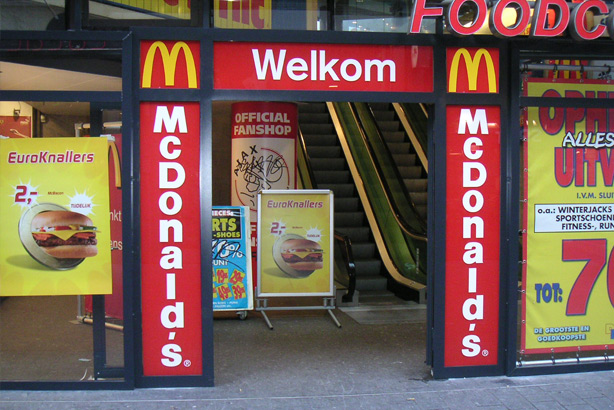

In [90]:
cv2_imshow(A)

### Leitura da imagem de template

In [91]:
# Lendo imagem de modelo (template) compartilhada no Google Drive
url_dados = "https://drive.google.com/file/d/1fouJfd44MTjwy87fsWDdTtX6AYwULMWd/view?usp=sharing"
lista_de_dados = [url_dados]

for url in lista_de_dados:
  a = url.find ('/d/')
  b = url.find ('/view?usp=sharing')

  id_file = url[a+3:b]
  print (id_file)
  !gdown --id $id_file

1fouJfd44MTjwy87fsWDdTtX6AYwULMWd
Downloading...
From: https://drive.google.com/uc?id=1fouJfd44MTjwy87fsWDdTtX6AYwULMWd
To: /content/T_mac2.jpg
100% 4.40k/4.40k [00:00<00:00, 5.94MB/s]


### Lendo a imagem modelo (template) via biblioteca OpenCV para ser impressa

In [92]:
T = cv.imread("T_mac2.jpg")

### Impressão da imagem template em tons de cinza

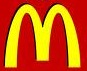

In [93]:
cv2_imshow(T)

### Listando métodos de similaridade existentes de Template Matching
*   cv.TM_CCOEFF
*   **cv.TM_CCOEFF_NORMED**
*   cv2.TM_CCORR
*   cv2.TM_CCORR_NORMED
*   cv2.TM_SQDIFF
*   cv2.TM_SQDIFF_NORMED


Modelo matemático do método TM_CCOEFF_NORMED usando neste algoritmo:

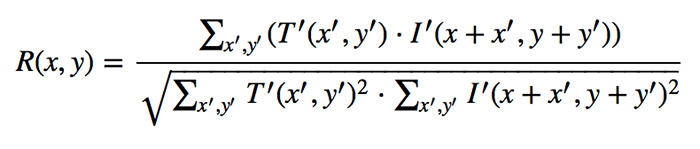

### Fluxograma do reconhecimento de padrão de imagem

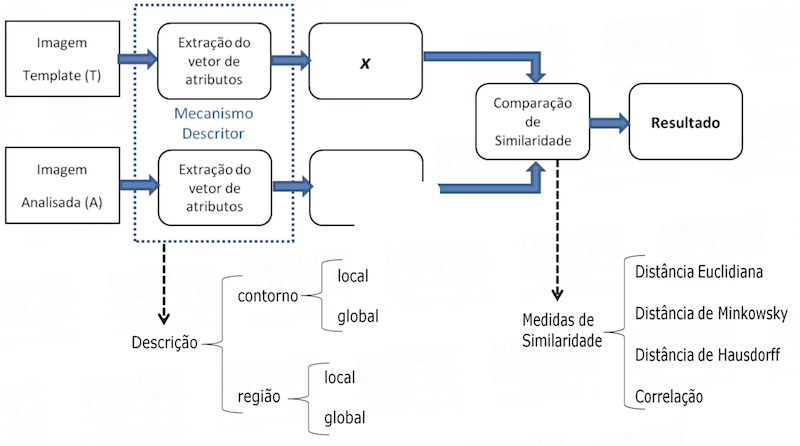

### Detecção dos símbolos MC'Donalds (template: "T_mac2.jpg") na imagem "A_mac_11.jpg"

### Imprimindo a imagem comparada

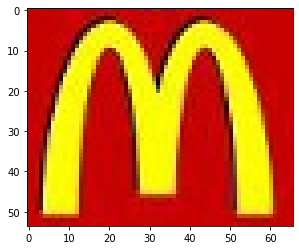

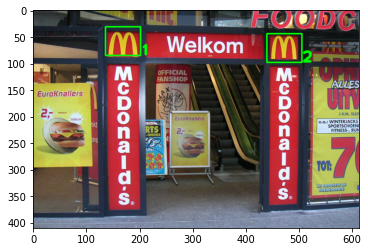

In [94]:
# Lendo a imagem a ser analisada e o template
A = cv.cvtColor(A,cv.COLOR_BGR2RGB)
T = cv.cvtColor(T,cv.COLOR_BGR2RGB)

# Redimensionando (escalonar) o template
h = int(T.shape[0]/1.3)
w = int(T.shape[1]/1.3)
dim = (w,h)
T = cv.resize(T, dim, interpolation = cv.INTER_CUBIC)

# Aplicando template matching usando o modelo matemático TM_CCOEFF_NORMED (Coeficiente de Correlação Normatizado)
res = cv.matchTemplate(A,T,cv.TM_CCORR_NORMED)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

# Assinalando os símbolos na imagem
threshold = 0.83
loc = np.where(res >= threshold)

top_left_ant = (0, 0)
cont=1
for i in range (len(loc[0])):
  top_left = (loc[1][i], loc[0][i])
  bottom_right = (top_left[0] + w, top_left[1] + h)
  if top_left[0] > top_left_ant[0] + w or top_left[1] > top_left_ant[1] + h :
    cv.rectangle(A,top_left, bottom_right, (0,255,0), 2)
    cv.putText(A,str(cont), bottom_right,1,2,(0,255,0),3,1)
    top_left_ant = top_left
    cont = cont +1

plot.imshow(T,cmap = 'gray')
plot.show()
plot.imshow(A,cmap = 'gray')
plot.show()
# plot.imshow(res,cmap = 'gray')